# Scoring and Analyzing Oral health behavior

The following answers are considered positive oral health behavior:
- Frequency of daily tooth brushing (≥ twice)
- Duration of tooth brushing (≥ 2 min)
- Frequency of replacing toothbrush (≤ 3 months)
- Frequency of visiting the dentist (regularly)

The following options are considered correct:

##### 1. Frequency of daily tooth brushing.
b. 2

c. More than 2


##### 2. Duration of tooth brushing.
b. 2 to 3 minutes

c. More than 3 minutes

##### 3. Frequency of replacing tooth brush.
a. Every month

b. Every two months

c. Every three months

##### 4. Frequency of visiting dentist.
a. Once a year

b. Twice a year

c. More than 2 times a year

In [547]:
%pip install pandas numpy
%pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [548]:
%pip install dataframe_image

import dataframe_image as dfi


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [549]:
df = pd.read_csv("../data/processed/oral-health-uofg-cleaned.csv")
df.isna().sum()

RecordID                                                                      0
Timestamp                                                                     0
Are you a student at University of Gezira?                                    0
Age                                                                           0
Gender                                                                        0
Faculty                                                                       0
Academic level                                                                0
Causes of dental caries                                                       0
Causes of bleeding during tooth brushing:                                     0
Influence of dental plaque:                                                   0
Measures that prevent oral diseases:                                          0
Systemic diseases that may be related to oral diseases:                       0
Which is more important for oral health:

In [550]:
academic_level_mapping = {
    "First year": "1st Year",
    "Second year": "2nd Year",
    "Third year": "3rd Year",
    "Fourth year": "4th Year",
    "Fifth year": "5th Year",
}
df["Academic level"] = df["Academic level"].map(academic_level_mapping)
df

,RecordID,Timestamp,Are you a student at University of Gezira?,Age,Gender,Faculty,Academic level,Causes of dental caries,Causes of bleeding during tooth brushing:,Influence of dental plaque:,Measures that prevent oral diseases:,Systemic diseases that may be related to oral diseases:,Which is more important for oral health: self-administration or dentist?:,Frequency of daily tooth brushing.,Duration of tooth brushing.,Frequency of replacing tooth brush.,Frequency of visiting dentist.,Method of tooth brushing:,Oral hygiene methods besides tooth brushing:,What oral health problem(s) do you have (you can choose more than one):
0,0,9/24/2023 22:01:24,Yes,23.0,Male,Medicine,4th Year,"Toothpaste without fluoride, Frequent ingestio...",Brushing too hard,Affecting appearance,Application of fluoride,Heart diseases,Self-administration of oral hygiene,1,2 to 3 minutes,Every three months,When I have a dental problem/oral disease,Irregular,Mouthwash,Abnormal growth of last molar in the left side...
1,1,9/24/2023 22:04:16,Yes,25.0,Male,Medicine,5th Year,Dynamic of oral micro-flora,Periodontal disease,Affecting appearance,Application of fluoride,Heart diseases,Self-administration of oral hygiene,2,More than 3 minutes,Every three months,Twice a year,Horizontal scrub,Mouthwash,Dental caries
2,2,9/24/2023 22:05:24,Yes,24.0,Male,Dentistry,4th Year,"Frequent ingestion of sugar, Dynamic of oral m...","Natural physiological phenomenon, Brushing too...",Don't know,"Application of fluoride, Pit & fissure sealing","None of the above, Other diseases",Regular visit to dentist,2,2 to 3 minutes,Every three months,Twice a year,Modified pass technique,Toothpick,No problem
3,3,9/24/2023 22:09:19,Yes,25.0,Male,Medicine,5th Year,"Frequent ingestion of sugar, Inadequate tooth ...","Periodontal disease, Brushing too hard, System...","Affecting appearance, Inducing dental caries, ...","Application of fluoride, Tooth scaling","Heart diseases, Diabetes mellitus, Hypertension",Self-administration of oral hygiene,1,More than 3 minutes,Every three months,Once a year,Vertical scrub,Mouthwash,Toothache
4,4,9/24/2023 22:09:26,Yes,20.0,Male,Medicine,3rd Year,"Frequent ingestion of sugar, Dynamic of oral m...","Brushing too hard, Systemic disease","Affecting appearance, Inducing dental caries",Application of fluoride,None of the above,Regular visit to dentist,1,2 to 3 minutes,Until it can't be used,When I have a dental problem/oral disease,Horizontal scrub,Sugar-free chewing gum,Toothache
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,403,9/27/2024 8:18:21,Yes,24.0,Male,Medicine,4th Year,"Dynamic of oral micro-flora, Inadequate tooth ...","Brushing too hard, Systemic disease","Affecting appearance, Inducing dental caries, ...",Application of fluoride,"Diabetes mellitus, Other diseases",Self-administration of oral hygiene,2,More than 3 minutes,Every two months,Once a year,Modified pass technique,Mouthwash,Tooth hypersensitivity
397,404,9/27/2024 8:22:00,Yes,24.0,Male,Medicine,4th Year,"Frequent ingestion of sugar, Dynamic of oral m...","Periodontal disease, Brushing too hard",Affecting appearance,"Application of fluoride, Tooth scaling","Heart diseases, Diabetes mellitus","Self-administration of oral hygiene, Regular v...",2,2 to 3 minutes,Every three months,When I have a dental problem/oral disease,Modified pass technique,Mouthwash,Oral ulcers
398,405,9/27/2024 13:57:21,Yes,25.0,Female,Medicine,5th Year,"Toothpaste without fluoride, Frequent ingestio...","Natural physiological phenomenon, Periodontal ...","Inducing dental caries, Including periodontal ...",Tooth scaling,Diabetes mellitus,Self-administration of oral hygiene,More than 2,2 to 3 minutes,Every month,More than 2 times a year,Modified pass technique,"Dental floss, Mouthwash, Sugar-free chewing gum","Dental caries, Gingival bleeding, Oral ulcers,..."
399,406,9/27/2024 19:07:55,Yes,25.0,Male,Medicine,4th Year,"Toothpaste without fluoride, Frequent ingestio...","Brushing too h

In [551]:
df_behavior = df[
    [
        "RecordID",
        "Gender",
        "Faculty",
        "Academic level",
        "Frequency of daily tooth brushing.",
        "Duration of tooth brushing.",
        "Frequency of replacing tooth brush.",
        "Frequency of visiting dentist.",
        "Method of tooth brushing:",
        "Oral hygiene methods besides tooth brushing:",
    ]
].copy()

df_behavior.rename(
    columns={
        "Frequency of daily tooth brushing.": "Q1",
        "Duration of tooth brushing.": "Q2",
        "Frequency of replacing tooth brush.": "Q3",
        "Frequency of visiting dentist.": "Q4",
        "Method of tooth brushing:": "Q5",
        "Oral hygiene methods besides tooth brushing:": "Q6",
    },
    inplace=True,
)

In [552]:
questions = {
    "Q1_score": "Frequency of daily tooth brushing (≥ twice)",
    "Q2_score": "Duration of tooth brushing (≥ 2 min)",
    "Q3_score": "Frequency of replacing tooth brush (≤ 3 months)",
    "Q4_score": "Frequency of visiting dentist (regularly)",
    "Q5_score": "Method of tooth brushing",
    "Q6_score": "Oral hygiene methods besides tooth brushing",
}

In [553]:
df_behavior.fillna({"Q6": "None"}, inplace=True)
df_behavior.isna().sum()  # Cleaning is done, no NaN values left

RecordID          0
Gender            0
Faculty           0
Academic level    0
Q1                0
Q2                0
Q3                0
Q4                0
Q5                0
Q6                0
dtype: int64

I'll be calculating if every unit answered correctly or not to be able to apply chi-square test later

In [554]:
df_behavior["Q1_score"] = df_behavior["Q1"].apply(
    lambda x: 1 if x in ["2", "More than 2"] else 0
)
df_behavior["Q2_score"] = df_behavior["Q2"].apply(
    lambda x: 1 if x in ["2 to 3 minutes", "More than 3 minutes"] else 0
)
df_behavior["Q3_score"] = df_behavior["Q3"].apply(
    lambda x: 1 if x in ["Every month", "Every two months", "Every three months"] else 0
)
df_behavior["Q4_score"] = df_behavior["Q4"].apply(
    lambda x: 1 if x in ["Once a year", "Twice a year"] else 0
)

In [555]:
def calculate_score(df, group, question, answers):
    """
    df: DataFrame containing the behavior data.
    group: The column to group by (e.g., 'Faculty').
    question: The question column to calculate the score for.
    answers: List of acceptable answers for the question.
    Calculate the score for a given question in the behavior DataFrame.
    """
    return (
        df[df[question].isin(answers)].groupby(group)[question].count()
        / df.groupby(group)[question].count()
    )

In [556]:
df_behavior["behavior_score"] = df_behavior[df_behavior.columns[10:]].sum(axis=1) / 4
df_behavior

,RecordID,Gender,Faculty,Academic level,Q1,Q2,Q3,Q4,Q5,Q6,Q1_score,Q2_score,Q3_score,Q4_score,behavior_score
0,0,Male,Medicine,4th Year,1,2 to 3 minutes,Every three months,When I have a dental problem/oral disease,Irregular,Mouthwash,0,1,1,0,0.50
1,1,Male,Medicine,5th Year,2,More than 3 minutes,Every three months,Twice a year,Horizontal scrub,Mouthwash,1,1,1,1,1.00
2,2,Male,Dentistry,4th Year,2,2 to 3 minutes,Every three months,Twice a year,Modified pass technique,Toothpick,1,1,1,1,1.00
3,3,Male,Medicine,5th Year,1,More than 3 minutes,Every three months,Once a year,Vertical scrub,Mouthwash,0,1,1,1,0.75
4,4,Male,Medicine,3rd Year,1,2 to 3 minutes,Until it can't be used,When I have a dental problem/oral disease,Horizontal scrub,Sugar-free chewing gum,0,1,0,0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,403,Male,Medicine,4th Year,2,More than 3 minutes,Every two months,Once a year,Modified pass technique,Mouthwash,1,1,1,1,1.00
397,404,Male,Medicine,4th Year,2,2 to 3 minutes,Every three months,When I have a dental problem/oral disease,Modified pass technique,Mouthwash,1,1,1,0,0.75
398,405,Female,Medicine,5th Year,More than 2,2 to 3 minutes,Every month,More than 2 times a year,Modified pass technique,"Dental floss, Mouthwash, Sugar-free chewing gum",1,1,1,0,0.75
399,406,Male,Medicine,4th Year,2,More than 3 minutes,Every month,When I have a dental problem/oral disease,Irregular,"Dental floss, Mouthwash, Sugar-free chewing gu...",1,1,1,0,0.75


In [557]:
df_behavior_faculty_score = pd.DataFrame(
    index=df_behavior["Faculty"].unique(),
    columns=["Q1_score", "Q2_score", "Q3_score", "Q4_score"],
)

In [558]:
df_behavior_faculty_score["Q1_score"] = calculate_score(
    df_behavior, "Faculty", "Q1", ["2", "More than 2"]
)
df_behavior_faculty_score["Q2_score"] = calculate_score(
    df_behavior, "Faculty", "Q2", ["2 to 3 minutes", "More than 3 minutes"]
)
df_behavior_faculty_score["Q3_score"] = calculate_score(
    df_behavior,
    "Faculty",
    "Q3",
    ["Every month", "Every two months", "Every three months"],
)
df_behavior_faculty_score["Q4_score"] = calculate_score(
    df_behavior, "Faculty", "Q4", ["Once a year", "Twice a year"]
)

df_behavior_faculty_score

,Q1_score,Q2_score,Q3_score,Q4_score
Medicine,0.744868,0.906158,0.785924,0.275660
Dentistry,0.900000,0.916667,0.916667,0.683333


Text(0.5, 1.0, 'Scores by Faculty per Behavior Question')

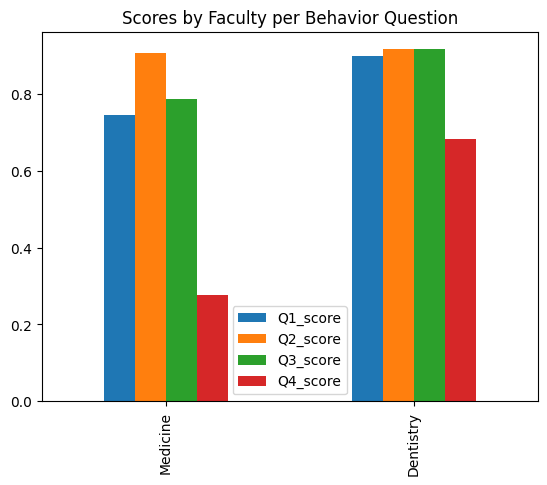

In [559]:
df_behavior_faculty_score.plot(kind="bar")
plt.title("Scores by Faculty per Behavior Question")

In [560]:
index = pd.MultiIndex.from_product(
    [df_behavior["Academic level"].unique(), df_behavior["Faculty"].unique()],
    names=["Academic level", "Faculty"],
)
df_behavior_level_faculty_score = pd.DataFrame(
    index=index, columns=["Q1_score", "Q2_score", "Q3_score", "Q4_score"]
)

In [561]:
df_behavior_level_faculty_score["Q1_score"] = calculate_score(
    df_behavior, ["Academic level", "Faculty"], "Q1", ["2", "More than 2"]
).reindex(index)
df_behavior_level_faculty_score["Q2_score"] = calculate_score(
    df_behavior,
    ["Academic level", "Faculty"],
    "Q2",
    ["2 to 3 minutes", "More than 3 minutes"],
).reindex(index)
df_behavior_level_faculty_score["Q3_score"] = calculate_score(
    df_behavior,
    ["Academic level", "Faculty"],
    "Q3",
    ["Every month", "Every two months", "Every three months"],
).reindex(index)
df_behavior_level_faculty_score["Q4_score"] = calculate_score(
    df_behavior, ["Academic level", "Faculty"], "Q4", ["Once a year", "Twice a year"]
).reindex(index)
df_behavior_level_faculty_score

Q1_score  Q2_score  Q3_score  Q4_score
Academic level Faculty                                          
4th Year       Medicine   0.738462  0.923077  0.784615  0.384615
               Dentistry  0.857143  0.952381  0.857143  0.476190
5th Year       Medicine   0.710843  0.903614  0.831325  0.337349
               Dentistry  0.888889  0.888889  1.000000  0.888889
3rd Year       Medicine   0.772277  0.900990  0.732673  0.198020
               Dentistry  1.000000  0.857143  1.000000  0.714286
2nd Year       Medicine   0.826087  0.934783  0.847826  0.282609
               Dentistry  0.933333  0.933333  0.933333  0.800000
1st Year       Medicine   0.673913  0.869565  0.760870  0.173913
               Dentistry  0.875000  0.875000  0.875000  0.750000


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


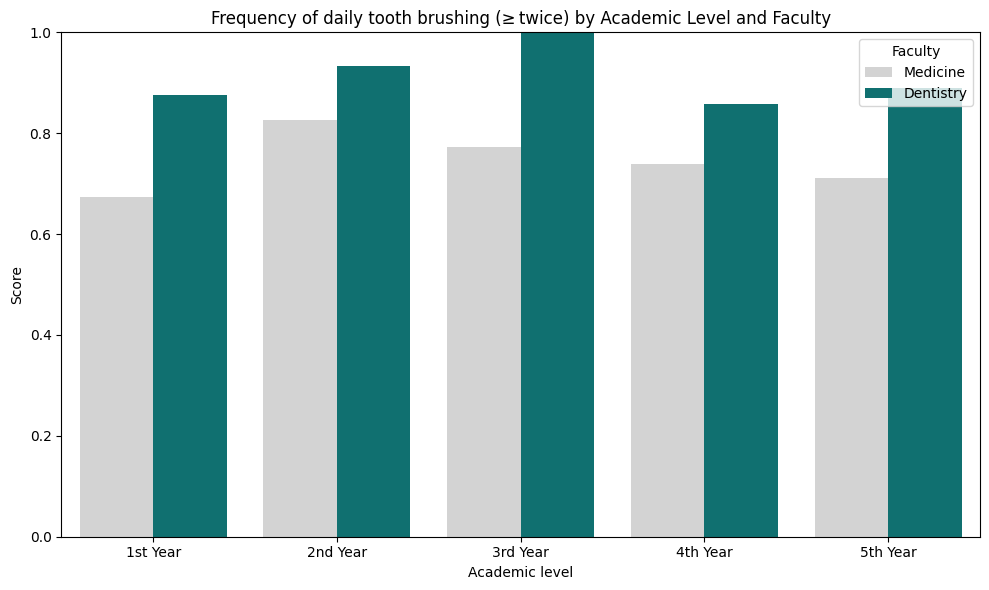

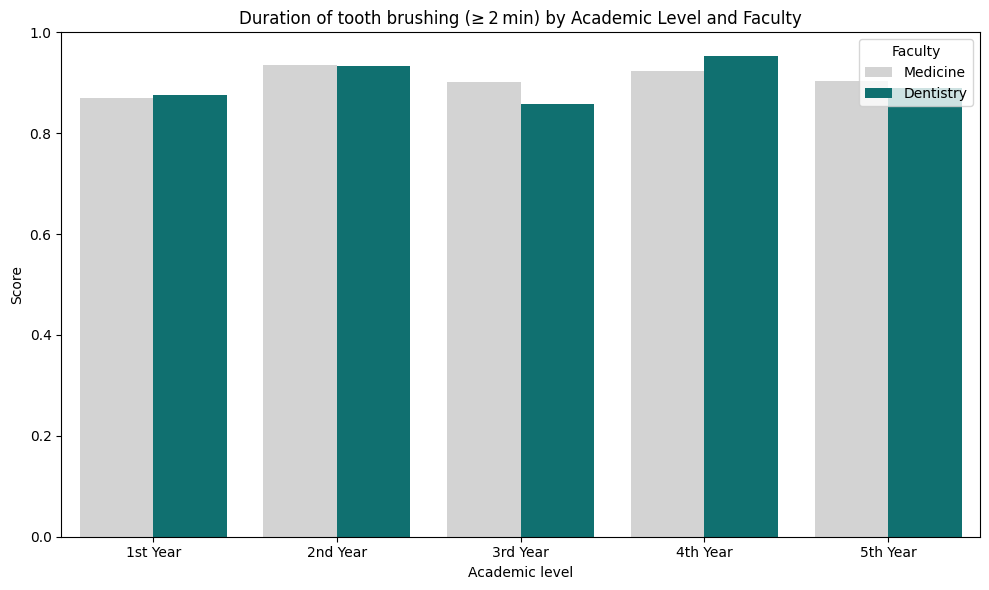

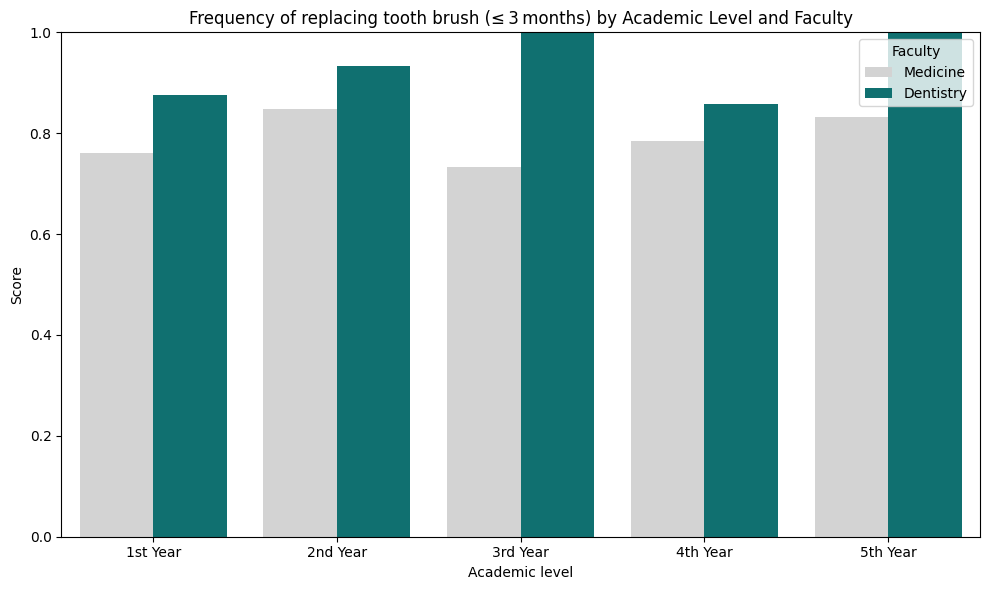

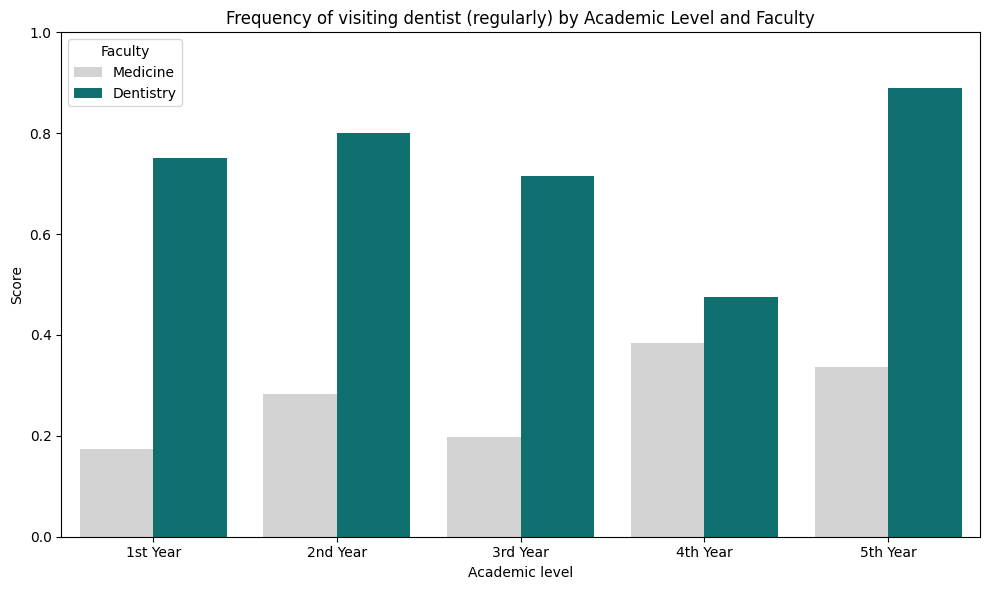

In [562]:
%pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# Reset index
df_plot = df_behavior_level_faculty_score.reset_index()

palette = {"Dentistry": "teal", "Medicine": "lightgray"}
order = ["1st Year", "2nd Year", "3rd Year", "4th Year", "5th Year"]


for question in df_behavior_level_faculty_score.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_plot,
        x="Academic level",
        y=question,
        order=order,
        hue="Faculty",
        palette=palette,
    )
    plt.title(f"{questions[question]} by Academic Level and Faculty")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

In [563]:
df_behavior.groupby(["Academic level", "Faculty"])[
    "behavior_score"
].mean().reset_index()

,Academic level,Faculty,behavior_score
0,1st Year,Dentistry,0.843750
1,1st Year,Medicine,0.619565
2,2nd Year,Dentistry,0.900000
3,2nd Year,Medicine,0.722826
4,3rd Year,Dentistry,0.892857
5,3rd Year,Medicine,0.650990
6,4th Year,Dentistry,0.785714
7,4th Year,Medicine,0.707692
8,5th Year,Dentistry,0.916667
9,5th Year,Medicine,0.695783


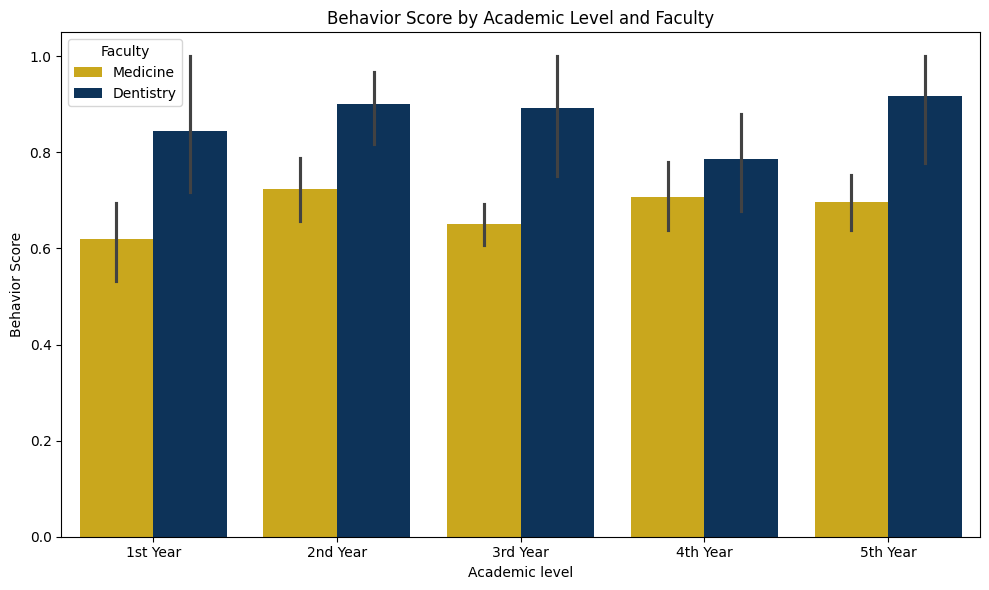

In [564]:
palette = {"Dentistry": "#003366", "Medicine": "#E6B800"}

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_behavior,
    x="Academic level",
    y="behavior_score",
    order=order,
    hue="Faculty",
    palette=palette,
)

plt.title("Behavior Score by Academic Level and Faculty")
plt.ylabel("Behavior Score")
plt.tight_layout()
plt.show()

In [565]:
group_faculty = df_behavior.groupby("Faculty")["behavior_score"].mean()
group_faculty

Faculty
Dentistry    0.854167
Medicine     0.678152
Name: behavior_score, dtype: float64

<Axes: xlabel='Faculty'>

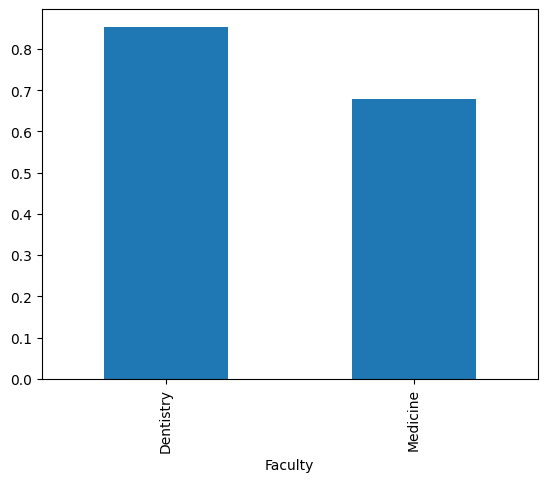

In [566]:
group_faculty.plot(kind="bar")

## Descriptive Analytics for Score of Behavior of Healthcare students
mean = 0.70

mode = 0.75

median = 0.75

std = 0.25

variance = 0.065


In [567]:
df_behavior["behavior_score"].describe()

count    401.000000
mean       0.704489
std        0.255475
min        0.000000
25%        0.500000
50%        0.750000
75%        1.000000
max        1.000000
Name: behavior_score, dtype: float64

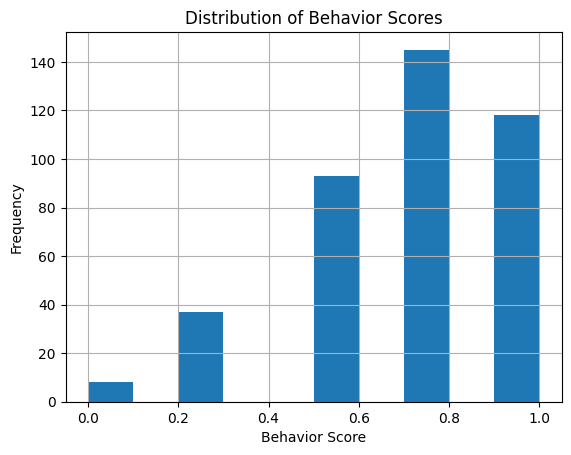

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [568]:
df_behavior["behavior_score"].describe()
df_behavior["behavior_score"].hist(bins=10)
plt.title("Distribution of Behavior Scores")
plt.xlabel("Behavior Score")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(10, 6))

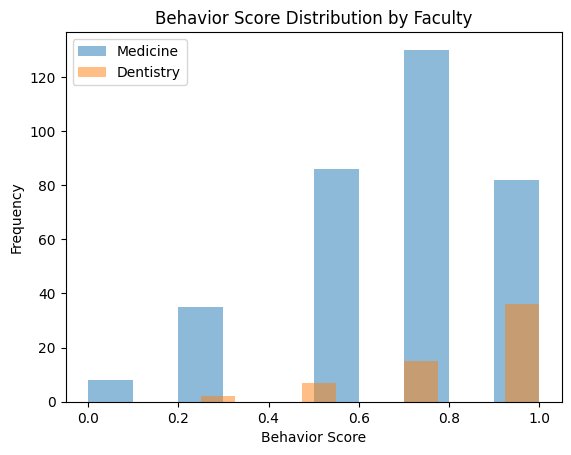

In [569]:
faculties = df["Faculty"].unique()

for faculty in faculties:
    subset = df_behavior[df_behavior["Faculty"] == faculty]
    plt.hist(subset["behavior_score"], bins=10, alpha=0.5, label=faculty)

plt.legend()
plt.xlabel("Behavior Score")
plt.ylabel("Frequency")
plt.title("Behavior Score Distribution by Faculty")
plt.show()

In [570]:
np.median(df_behavior["behavior_score"])

np.float64(0.75)

In [571]:
import statistics

statistics.mode(df_behavior["behavior_score"])

0.75

In [572]:
np.var(df_behavior["behavior_score"], ddof=1)  # Using ddof=1 for sample variance

np.float64(0.06526730049875312)

{'whiskers': [<matplotlib.lines.Line2D at 0x125994bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x125996990>,
 'boxes': [<matplotlib.lines.Line2D at 0x125997f90>],
 'medians': [<matplotlib.lines.Line2D at 0x1258afe10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1256f6c50>],
 'means': []}

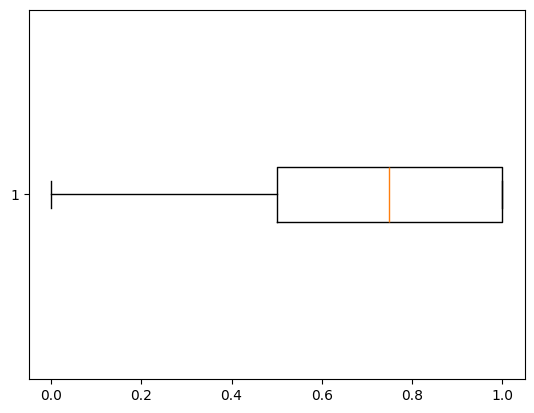

In [573]:
plt.boxplot(df_behavior["behavior_score"], vert=False)

Since the whiskers extend until 0, there's no outliers

## Inferential Statistics of Behavior among healthcare students
1. Hypothesis building
2. Population and Sample
3. Hypothesis testing
4. p-value
5. Significance
6. Errors

#### H₀ (Null): There is no significant difference in oral health behaviors between dental and medical students at University of Gezira.

To measure the p-value and verify the significance of the differences seen above, calculations will be divided into two parts:
1. Checking if proportions differ between groups regarding every question comparing the number of students who answered correctly vs incorrectly for each question. Chi-square test was used before for this purpose, but since groups are imbalanced (refer to cleaning.ipynb to check exact number of each group) I will experiment with using Fisher's Exact Test.
2. To check the significance of difference between total score (sum of correct answers) between groups, t-test will be used 

In [574]:
%pip install scipy

from scipy.stats import fisher_exact


def compute_pvalues_fisher(df_long, group_col, value_col, pvals):
    """
    Args:
    df_long (_type_): a wide format DataFrame with columns for group, value, and question
    group_col (_type_): a list of columns that are used to group the data.
    value_col (_type_): The value column that contains the numerical data to be analyzed.
    question_col (_type_): The column that contains the question options.
    """
    if isinstance(group_col, str):
        group_col = [group_col]

    # group by the first grouping column (e.g., academic_level)
    if len(group_col) != 2:
        contingency_table = pd.crosstab(df_long[group_col[0]], df_long[value_col])
        if contingency_table.shape != (2, 2):
            pvals[value_col] = float("nan")
        else:
            oddsratio, p = fisher_exact(contingency_table)
            pvals[value_col] = round(p, 2)
    else:
        for first_group_val, subgroup in df_long.groupby(group_col[0]):
            # create contingency table with rows = second grouping column (e.g., faculty)
            # columns = value_col (0/1)
            contingency_table = pd.crosstab(subgroup[group_col[1]], subgroup[value_col])

            # If the table is degenerate (e.g., no variation), skip or assign p=nan
            if contingency_table.shape != (2, 2):
                pvals[(value_col, first_group_val)] = float("nan")
            else:
                oddsratio, p = fisher_exact(contingency_table)
                pvals[(value_col, first_group_val)] = round(p, 2)


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [575]:
pvals = {}

In [576]:
pvals = {}
questions = ["Q1_score", "Q2_score", "Q3_score", "Q4_score"]
for question in questions:
    compute_pvalues_fisher(
        df_long=df_behavior,
        group_col=["Academic level", "Faculty"],
        value_col=question,
        pvals=pvals,
    )

In [577]:
def final_table(table_academic_level, pvals, title):
    # Assuming table_academic_level is your pivot table with MultiIndex columns
    # And pvals is your dictionary: keys=(question, academic_level), values=p-value

    # Step 1: Create empty DataFrame for p-values
    pval_df = pd.DataFrame(index=table_academic_level.index)

    # Get all unique academic levels in the order they appear in the columns
    academic_levels = table_academic_level.columns.get_level_values(0).unique()

    for level in academic_levels:
        # Build a Series of p-values for all questions for this academic level
        pvals_for_level = {
            question: pvals.get((question, level), np.nan)
            for question in table_academic_level.index
        }
        pval_series = pd.Series(pvals_for_level, index=table_academic_level.index)

        # Add to pval_df with MultiIndex column
        pval_df[(level, "p-value")] = pval_series

    # Concatenate pval_df to original pivot table
    combined = pd.concat([table_academic_level, pval_df], axis=1)

    # Reorder columns to put 'p-value' after each academic level's faculties
    new_cols = []

    for level in academic_levels:
        # Get all columns for this level excluding p-value
        level_faculties = [
            col for col in table_academic_level.columns if col[0] == level
        ]
        new_cols.extend(level_faculties)
        # Append the p-value column for this level
        new_cols.append((level, "p-value"))

    # Select columns in new order
    final_table = combined[new_cols]

    # Export the final table as an image
    dfi.export(final_table, f"../results/tables/{title}.png", table_conversion="chrome")

    return final_table

In [578]:
df_behavior_pivot = df_behavior.pivot_table(
    index=[],
    columns=["Academic level", "Faculty"],
    values=["Q1_score", "Q2_score", "Q3_score", "Q4_score"],
    aggfunc="mean",
)

In [579]:
table = final_table(
    df_behavior_pivot, pvals, "behavior_analysis_proportions_questions_level_faculty"
)
table

1st Year                    2nd Year                    3rd Year  \
         Dentistry  Medicine p-value Dentistry  Medicine p-value Dentistry   
Q1_score     0.875  0.673913    0.41  0.933333  0.826087    0.43  1.000000   
Q2_score     0.875  0.869565    1.00  0.933333  0.934783    1.00  0.857143   
Q3_score     0.875  0.760870    0.67  0.933333  0.847826    0.67  1.000000   
Q4_score     0.750  0.173913    0.00  0.800000  0.282609    0.00  0.714286   

                            4th Year                    5th Year            \
          Medicine p-value Dentistry  Medicine p-value Dentistry  Medicine   
Q1_score  0.772277    0.34  0.857143  0.738462    0.38  0.888889  0.710843   
Q2_score  0.900990    0.54  0.952381  0.923077    1.00  0.888889  0.903614   
Q3_score  0.732673    0.19  0.857143  0.784615    0.55  1.000000  0.831325   
Q4_score  0.198020    0.01  0.476190  0.384615    0.61  0.888889  0.337349   

                  
         p-value  
Q1_score    0.44  
Q2_score    1.00  
Q3_score    0.35  
Q4_score    0.00

In [580]:
pvals = {}
questions = ["Q1_score", "Q2_score", "Q3_score", "Q4_score"]
for question in questions:
    compute_pvalues_fisher(
        df_long=df_behavior, group_col=["Faculty"], value_col=question, pvals=pvals
    )

In [581]:
df_behavior_faculty_pivot = df_behavior.pivot_table(
    index=[],
    columns=["Faculty"],
    values=["Q1_score", "Q2_score", "Q3_score", "Q4_score"],
    aggfunc="mean",
)

In [582]:
p_vals = pd.Series(pvals, index=df_behavior_faculty_pivot.index)
table_with_p_faculty = pd.concat(
    [df_behavior_faculty_pivot, p_vals.rename("p-value")], axis=1
)
table_with_p_faculty.columns.name = None
dfi.export(
    table_with_p_faculty,
    f"../results/tables/behavior_analysis_proportions_questions_faculty.png",
    table_conversion="chrome",
)

table_with_p_faculty

,Dentistry,Medicine,p-value
Q1_score,0.900000,0.744868,0.01
Q2_score,0.916667,0.906158,1.00
Q3_score,0.916667,0.785924,0.02
Q4_score,0.683333,0.275660,0.00


For each behavior question (Q1–Q4), a score is assigned of 1 if a student’s answer matches the “correct” or positive behavior, and 0 otherwise. This means each student’s response to each question is treated as a binary outcome: correct (1) or incorrect (0).

To compare groups (such as Dentistry vs Medicine, or different academic levels), the proportion of students are looked at in each group who answered each question correctly. For example, you might find that 80% of Dentistry students answered Q1 correctly, compared to 60% of Medicine students.

To test whether these differences in proportions are statistically significant, we use Fisher’s exact test. This test is especially useful when groups are small or imbalanced, as it gives an exact p-value for the difference in proportions between groups.



Using the fisher's test in determining significance seems like a wise option. The p-value is meaningful in this context and truly identifies the differences when necessary.

It seems like the null hypothesis is highly possible to be rejected. Final call will be left to the final calculation of the behavior_score. Before moving forward, I will use one hot encoding to figure out Q5 and Q6 and also apply Fisher's exact test on it.

In [583]:
df_behavior_wide = df_behavior[
    ["Gender", "Faculty", "Academic level", "Q5", "Q6"]
].copy()

In [584]:
%pip install scikit-learn

from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

mlb = MultiLabelBinarizer()

# Wrap each entry as a list, so mlb works properly
q5_lists = df_behavior_wide["Q5"].apply(lambda x: [x] if pd.notnull(x) else [])

one_hot = pd.DataFrame(
    mlb.fit_transform(q5_lists), columns=mlb.classes_, index=df_behavior_wide.index
)

df_join = df_behavior_wide.join(one_hot)
df_join


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


,Gender,Faculty,Academic level,Q5,Q6,Fones technique,Horizontal scrub,Irregular,Modified pass technique,Vertical scrub
0,Male,Medicine,4th Year,Irregular,Mouthwash,0,0,1,0,0
1,Male,Medicine,5th Year,Horizontal scrub,Mouthwash,0,1,0,0,0
2,Male,Dentistry,4th Year,Modified pass technique,Toothpick,0,0,0,1,0
3,Male,Medicine,5th Year,Vertical scrub,Mouthwash,0,0,0,0,1
4,Male,Medicine,3rd Year,Horizontal scrub,Sugar-free chewing gum,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
396,Male,Medicine,4th Year,Modified pass technique,Mouthwash,0,0,0,1,0
397,Male,Medicine,4th Year,Modified pass technique,Mouthwash,0,0,0,1,0
398,Female,Medicine,5th Year,Modified pass technique,"Dental floss, Mouthwash, Sugar-free chewing gum",0,0,0,1,0
399,Male,Medicine,4th Year,Irregular,"Dental floss, Mouthwash, Sugar-free chewing gu...",0,0,1,0,0


In [585]:
pvals = {}
for col in one_hot.columns:
    compute_pvalues_fisher(
        df_long=df_join,
        group_col=["Academic level", "Faculty"],
        value_col=col,
        pvals=pvals,
    )
pvals

{('Fones technique', '1st Year'): np.float64(0.57),
 ('Fones technique', '2nd Year'): 1.0,
 ('Fones technique', '3rd Year'): np.float64(0.29),
 ('Fones technique', '4th Year'): 1.0,
 ('Fones technique', '5th Year'): 1.0,
 ('Horizontal scrub', '1st Year'): np.float64(0.33),
 ('Horizontal scrub', '2nd Year'): np.float64(0.1),
 ('Horizontal scrub', '3rd Year'): 1.0,
 ('Horizontal scrub', '4th Year'): np.float64(0.44),
 ('Horizontal scrub', '5th Year'): np.float64(0.35),
 ('Irregular', '1st Year'): np.float64(0.42),
 ('Irregular', '2nd Year'): np.float64(0.03),
 ('Irregular', '3rd Year'): np.float64(0.67),
 ('Irregular', '4th Year'): np.float64(0.34),
 ('Irregular', '5th Year'): np.float64(0.59),
 ('Modified pass technique', '1st Year'): np.float64(0.41),
 ('Modified pass technique', '2nd Year'): 1.0,
 ('Modified pass technique', '3rd Year'): 1.0,
 ('Modified pass technique', '4th Year'): np.float64(0.08),
 ('Modified pass technique', '5th Year'): np.float64(0.0),
 ('Vertical scrub', '1st 

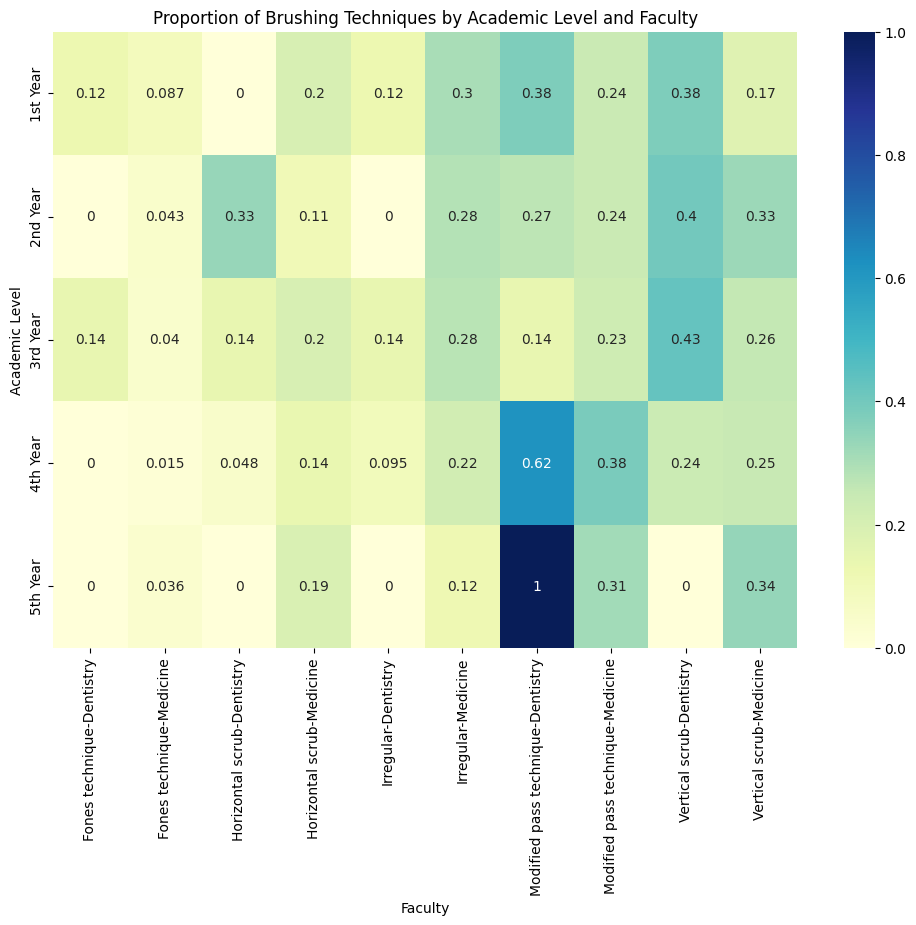

In [586]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming one_hot is your one-hot encoded DataFrame for methods
pivot = df_join.pivot_table(
    index="Academic level", columns="Faculty", values=one_hot.columns, aggfunc="mean"
)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", vmin=0, vmax=1)
plt.title("Proportion of Brushing Techniques by Academic Level and Faculty")
plt.ylabel("Academic Level")
plt.xlabel("Faculty")
plt.show()

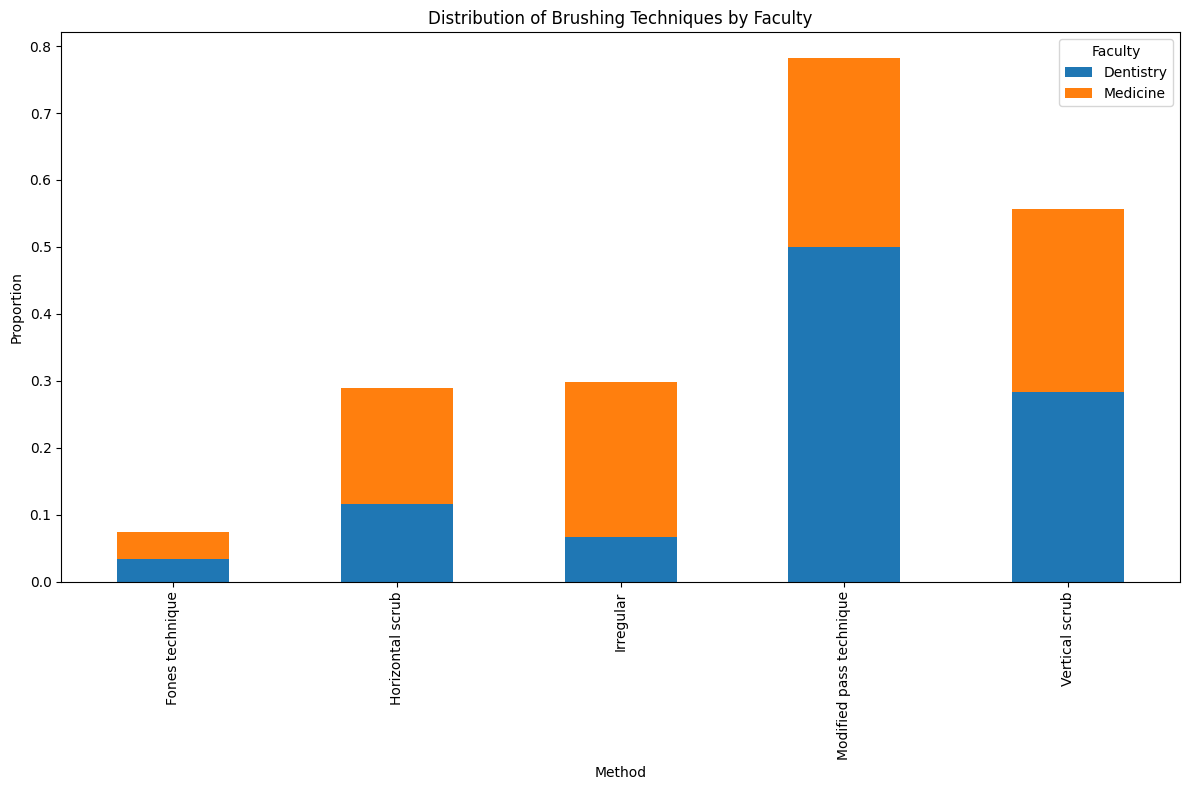

In [587]:
method_counts = df_join.groupby("Faculty")[one_hot.columns].sum()
method_props = method_counts.div(method_counts.sum(axis=1), axis=0)

method_props.T.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title("Distribution of Brushing Techniques by Faculty")
plt.ylabel("Proportion")
plt.xlabel("Method")
plt.legend(title="Faculty")
plt.tight_layout()
plt.show()

In [588]:
df_behavior_pivot = df_join.pivot_table(
    index=[],
    columns=["Academic level", "Faculty"],
    values=one_hot.columns,
    aggfunc="mean",
)
df_behavior_pivot

Academic level           1st Year            2nd Year            3rd Year  \
Faculty                 Dentistry  Medicine Dentistry  Medicine Dentistry   
Fones technique             0.125  0.086957  0.000000  0.043478  0.142857   
Horizontal scrub            0.000  0.195652  0.333333  0.108696  0.142857   
Irregular                   0.125  0.304348  0.000000  0.282609  0.142857   
Modified pass technique     0.375  0.239130  0.266667  0.239130  0.142857   
Vertical scrub              0.375  0.173913  0.400000  0.326087  0.428571   

Academic level                     4th Year            5th Year            
Faculty                  Medicine Dentistry  Medicine Dentistry  Medicine  
Fones technique          0.039604  0.000000  0.015385       0.0  0.036145  
Horizontal scrub         0.198020  0.047619  0.138462       0.0  0.192771  
Irregular                0.277228  0.095238  0.215385       0.0  0.120482  
Modified pass technique  0.227723  0.619048  0.384615       1.0  0.313253  
Vertical scrub           0.257426  0.238095  0.246154       0.0  0.337349

In [589]:
table = final_table(df_behavior_pivot, pvals, "method_of_tooth_brushing_level_faculty")
table

1st Year                    2nd Year            \
                        Dentistry  Medicine p-value Dentistry  Medicine   
Fones technique             0.125  0.086957    0.57  0.000000  0.043478   
Horizontal scrub            0.000  0.195652    0.33  0.333333  0.108696   
Irregular                   0.125  0.304348    0.42  0.000000  0.282609   
Modified pass technique     0.375  0.239130    0.41  0.266667  0.239130   
Vertical scrub              0.375  0.173913    0.34  0.400000  0.326087   

                                 3rd Year                    4th Year  \
                        p-value Dentistry  Medicine p-value Dentistry   
Fones technique            1.00  0.142857  0.039604    0.29  0.000000   
Horizontal scrub           0.10  0.142857  0.198020    1.00  0.047619   
Irregular                  0.03  0.142857  0.277228    0.67  0.095238   
Modified pass technique    1.00  0.142857  0.227723    1.00  0.619048   
Vertical scrub             0.76  0.428571  0.257426    0.38  0.238095   

                                           5th Year                    
                         Medicine p-value Dentistry  Medicine p-value  
Fones technique          0.015385    1.00       0.0  0.036145    1.00  
Horizontal scrub         0.138462    0.44       0.0  0.192771    0.35  
Irregular                0.215385    0.34       0.0  0.120482    0.59  
Modified pass technique  0.384615    0.08       1.0  0.313253    0.00  
Vertical scrub           0.246154    1.00       0.0  0.337349    0.05

In [590]:
df_behavior_faculty_pivot = df_join.pivot_table(
    index=[], columns=["Faculty"], values=one_hot.columns, aggfunc="mean"
)

df_behavior_faculty_pivot

Faculty,Dentistry,Medicine
Fones technique,0.033333,0.041056
Horizontal scrub,0.116667,0.173021
Irregular,0.066667,0.231672
Modified pass technique,0.500000,0.281525
Vertical scrub,0.283333,0.272727


In [591]:
pvals = {}
for col in one_hot.columns:
    compute_pvalues_fisher(
        df_long=df_join, group_col=["Faculty"], value_col=col, pvals=pvals
    )

In [592]:
p_vals = pd.Series(pvals, index=df_behavior_faculty_pivot.index)
table_with_p_faculty = pd.concat(
    [df_behavior_faculty_pivot, p_vals.rename("p-value")], axis=1
)
table_with_p_faculty.columns.name = None

dfi.export(
    table_with_p_faculty,
    f"../results/tables/method_of_tooth_brushing_faculty.png",
    table_conversion="chrome",
)
table_with_p_faculty

,Dentistry,Medicine,p-value
Fones technique,0.033333,0.041056,1.00
Horizontal scrub,0.116667,0.173021,0.35
Irregular,0.066667,0.231672,0.00
Modified pass technique,0.500000,0.281525,0.00
Vertical scrub,0.283333,0.272727,0.88


Most of dentistry students brush their teeth more than twice a day, while most medicine students brush once or twice a day. Dentistry students also brush for longer durations and replace their toothbrushes more frequently. The difference in behavior scores between faculties is statistically significant for most of the questions, with dentistry students scoring higher on average.

In [593]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

mlb = MultiLabelBinarizer()

df_behavior_wide["Q6_split"] = df_behavior_wide["Q6"].str.split(", ")

one_hot = pd.DataFrame(
    mlb.fit_transform(df_behavior_wide["Q6_split"]),
    columns=mlb.classes_,
    index=df_behavior_wide.index,
)
df_behavior_wide.drop(columns=["Q6_split"], inplace=True)
df_join = df_behavior_wide.join(one_hot)

In [594]:
pvals = {}
for col in one_hot.columns:
    compute_pvalues_fisher(
        df_long=df_join,
        group_col=["Academic level", "Faculty"],
        value_col=col,
        pvals=pvals,
    )

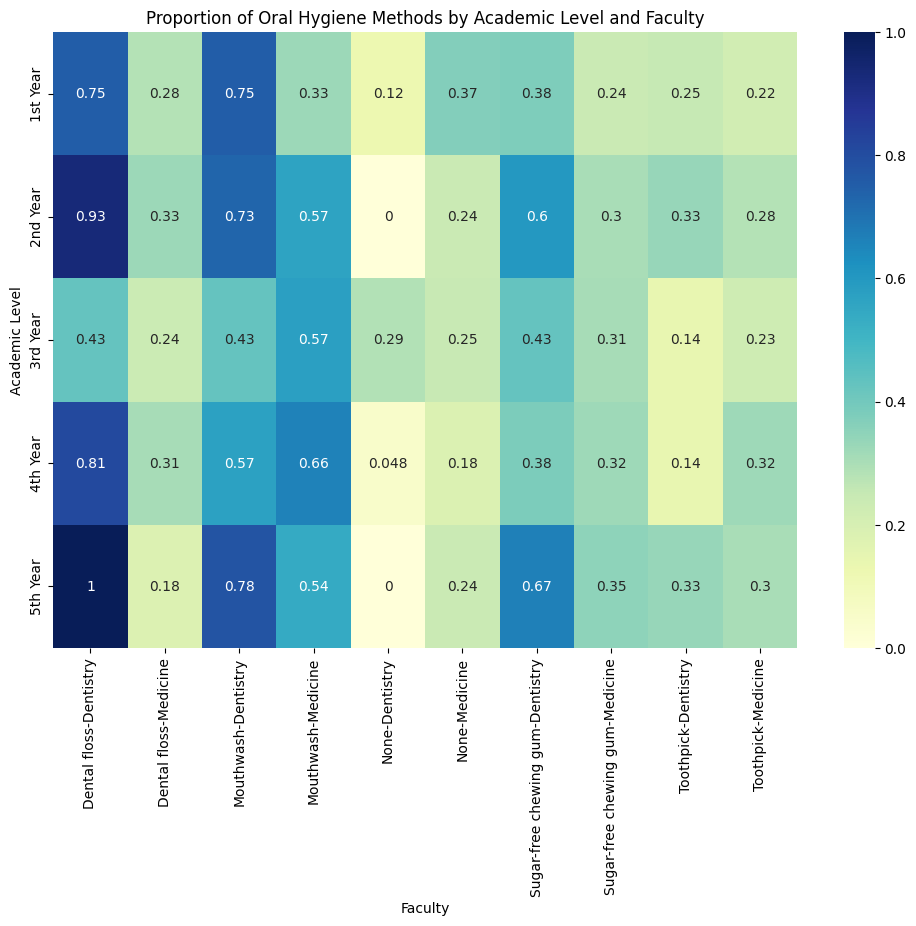

In [595]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming one_hot is your one-hot encoded DataFrame for methods
pivot = df_join.pivot_table(
    index="Academic level", columns="Faculty", values=one_hot.columns, aggfunc="mean"
)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", vmin=0, vmax=1)
plt.title("Proportion of Oral Hygiene Methods by Academic Level and Faculty")
plt.ylabel("Academic Level")
plt.xlabel("Faculty")
plt.show()

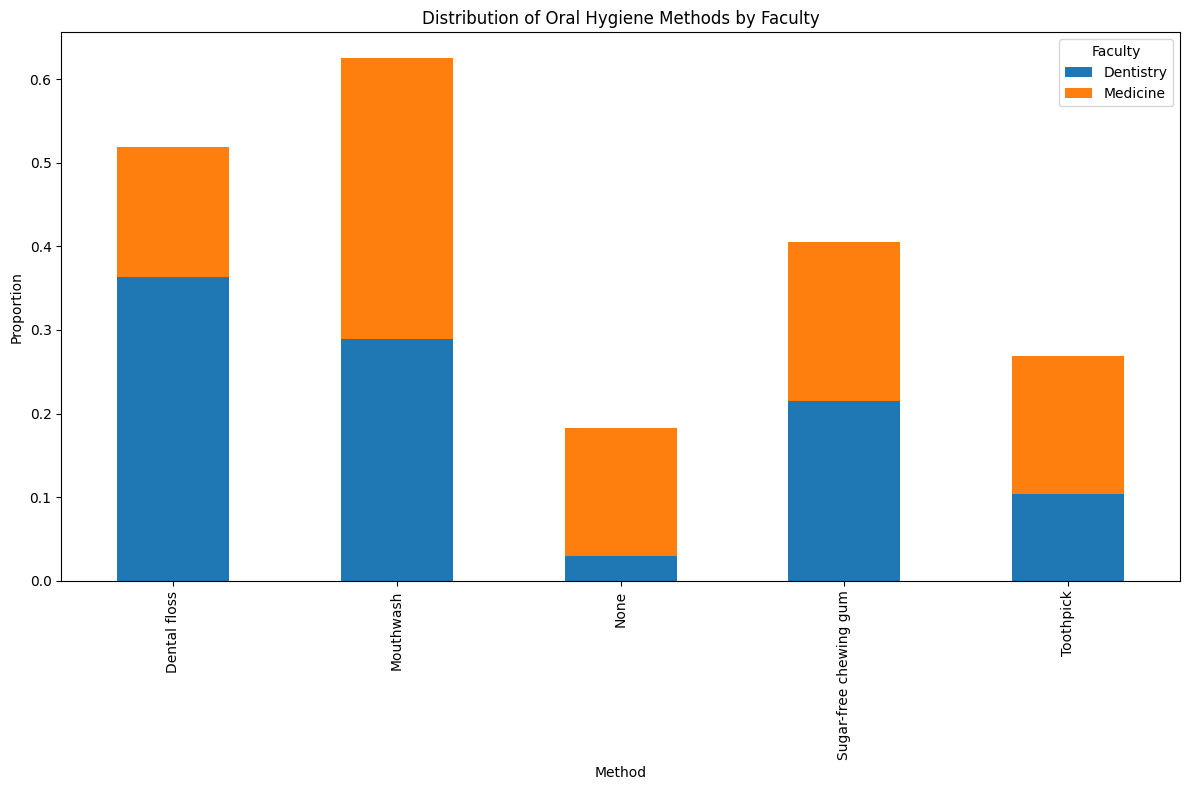

In [596]:
method_counts = df_join.groupby("Faculty")[one_hot.columns].sum()
method_props = method_counts.div(method_counts.sum(axis=1), axis=0)

method_props.T.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title("Distribution of Oral Hygiene Methods by Faculty")
plt.ylabel("Proportion")
plt.xlabel("Method")
plt.legend(title="Faculty")
plt.tight_layout()
plt.show()

In [597]:
df_behavior_pivot = df_join.pivot_table(
    index=[],
    columns=["Academic level", "Faculty"],
    values=one_hot.columns,
    aggfunc="mean",
)
df_behavior_pivot

Academic level          1st Year            2nd Year            3rd Year  \
Faculty                Dentistry  Medicine Dentistry  Medicine Dentistry   
Dental floss               0.750  0.282609  0.933333  0.326087  0.428571   
Mouthwash                  0.750  0.326087  0.733333  0.565217  0.428571   
None                       0.125  0.369565  0.000000  0.239130  0.285714   
Sugar-free chewing gum     0.375  0.239130  0.600000  0.304348  0.428571   
Toothpick                  0.250  0.217391  0.333333  0.282609  0.142857   

Academic level                    4th Year            5th Year            
Faculty                 Medicine Dentistry  Medicine Dentistry  Medicine  
Dental floss            0.237624  0.809524  0.307692  1.000000  0.180723  
Mouthwash               0.574257  0.571429  0.661538  0.777778  0.542169  
None                    0.247525  0.047619  0.184615  0.000000  0.240964  
Sugar-free chewing gum  0.306931  0.380952  0.323077  0.666667  0.349398  
Toothpick               0.227723  0.142857  0.323077  0.333333  0.301205

In [598]:
table = final_table(
    df_behavior_pivot,
    pvals,
    "oral_hygiene_methods_besides_tooth_brushing_level_faculty",
)
table

1st Year                    2nd Year            \
                       Dentistry  Medicine p-value Dentistry  Medicine   
Dental floss               0.750  0.282609    0.02  0.933333  0.326087   
Mouthwash                  0.750  0.326087    0.04  0.733333  0.565217   
None                       0.125  0.369565    0.24  0.000000  0.239130   
Sugar-free chewing gum     0.375  0.239130    0.41  0.600000  0.304348   
Toothpick                  0.250  0.217391    1.00  0.333333  0.282609   

                                3rd Year                    4th Year  \
                       p-value Dentistry  Medicine p-value Dentistry   
Dental floss              0.00  0.428571  0.237624    0.36  0.809524   
Mouthwash                 0.36  0.428571  0.574257    0.47  0.571429   
None                      0.05  0.285714  0.247525    1.00  0.047619   
Sugar-free chewing gum    0.06  0.428571  0.306931    0.68  0.380952   
Toothpick                 0.75  0.142857  0.227723    1.00  0.142857   

                                          5th Year                    
                        Medicine p-value Dentistry  Medicine p-value  
Dental floss            0.307692    0.00  1.000000  0.180723    0.00  
Mouthwash               0.661538    0.60  0.777778  0.542169    0.29  
None                    0.184615    0.17  0.000000  0.240964    0.20  
Sugar-free chewing gum  0.323077    0.79  0.666667  0.349398    0.08  
Toothpick               0.323077    0.16  0.333333  0.301205    1.00

In [599]:
df_behavior_faculty_pivot = df_join.pivot_table(
    index=[], columns=["Faculty"], values=one_hot.columns, aggfunc="mean"
)

df_behavior_faculty_pivot

Faculty,Dentistry,Medicine
Dental floss,0.816667,0.255132
Mouthwash,0.650000,0.548387
None,0.066667,0.249267
Sugar-free chewing gum,0.483333,0.310850
Toothpick,0.233333,0.269795


In [600]:
pvals = {}
for col in one_hot.columns:
    compute_pvalues_fisher(
        df_long=df_join, group_col=["Faculty"], value_col=col, pvals=pvals
    )

In [601]:
p_vals = pd.Series(pvals, index=df_behavior_faculty_pivot.index)
table_with_p_faculty = pd.concat(
    [df_behavior_faculty_pivot, p_vals.rename("p-value")], axis=1
)
table_with_p_faculty.columns.name = None
dfi.export(
    table_with_p_faculty,
    f"../results/tables/oral_hygiene_methods_besides_tooth_brushing_faculty.png",
    table_conversion="chrome",
)
table_with_p_faculty

,Dentistry,Medicine,p-value
Dental floss,0.816667,0.255132,0.00
Mouthwash,0.650000,0.548387,0.16
None,0.066667,0.249267,0.00
Sugar-free chewing gum,0.483333,0.310850,0.01
Toothpick,0.233333,0.269795,0.64


### To check the significance of difference between total score (sum of correct answers) between groups, t-test will be used 

In [602]:
import scipy.stats as stats

pvals = {}
for level, subgroup in df_behavior.groupby("Academic level"):
    # Create two groups based on the second grouping column
    groups = [
        group["behavior_score"].values for name, group in subgroup.groupby("Faculty")
    ]
    _, p = stats.ttest_ind(groups[0], groups[1], equal_var=False)
    pvals[level] = round(p, 2)


table = df_behavior.pivot_table(
    values="behavior_score",
    index=[],
    columns=["Academic level", "Faculty"],
    aggfunc=np.mean,
)

/var/folders/k8/490lh42x07b9r46c0sf7k9jh0000gn/T/ipykernel_82611/3669423980.py:13: FutureWarning: The provided callable <function mean at 0x11388e020> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = df_behavior.pivot_table(


In [603]:
pval_df = pd.DataFrame(index=table.index)

# For each academic level, create a p-value column with NaNs (or p-value repeated)
for level in pvals:
    # Create a MultiIndex column with (level, 'p-value')
    col = pd.MultiIndex.from_tuples([(level, "p-value")])
    # Create a Series with the p-value repeated for all rows (likely just one row)
    pval_series = pd.Series([pvals[level]] * len(table), index=table.index)
    # Assign to DataFrame
    pval_df[col] = pval_series

# Now concatenate along columns
combined = pd.concat([table, pval_df], axis=1)

new_cols = []

for level in sorted(table.columns.levels[0]):  # iterate academic levels in order
    # faculty columns for this level
    faculties = [col for col in table.columns if col[0] == level]
    new_cols.extend(faculties)
    # add p-value column for this level
    new_cols.append((level, "p-value"))

combined = combined[new_cols]
dfi.export(
    combined,
    f"../results/tables/behavior_analysis_score_level_faculty.png",
    table_conversion="chrome",
)
combined

/var/folders/k8/490lh42x07b9r46c0sf7k9jh0000gn/T/ipykernel_82611/3916819323.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval_df[col] = pval_series
/var/folders/k8/490lh42x07b9r46c0sf7k9jh0000gn/T/ipykernel_82611/3916819323.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pval_df[col] = pval_series
/var/folders/k8/490lh42x07b9r46c0sf7k9jh0000gn/T/ipykernel_82611/3916819323.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos

1st Year                    2nd Year                    \
               Dentistry  Medicine p-value Dentistry  Medicine p-value   
behavior_score   0.84375  0.619565    0.03       0.9  0.722826     0.0   

                3rd Year                   4th Year                    \
               Dentistry Medicine p-value Dentistry  Medicine p-value   
behavior_score  0.892857  0.65099    0.02  0.785714  0.707692    0.22   

                5th Year                    
               Dentistry  Medicine p-value  
behavior_score  0.916667  0.695783    0.01

Because the p-values from separate year-by-year comparisons vary drastically, it is unclear whether these differences reflect a consistent pattern or are due to random variation. Performing multiple independent tests increases the risk of Type I error (false positives), meaning that some ‘significant’ results might occur purely by chance. A two-way ANOVA addresses this by assessing the overall effects of Faculty and Academic Level, as well as their interaction, within a single model. This not only controls for the inflation of Type I error but also provides a clearer picture of whether the observed differences are systematic across years or isolated to certain levels.

In [658]:
df_behavior = df_behavior.rename(columns={"Academic level": "Academic_level"})


import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Example: Assuming df has columns 'behavior_score', 'Academic_level', 'Faculty'
# Academic_level should be categorical
df_behavior["Academic_level"] = pd.Categorical(
    df_behavior["Academic_level"],
    categories=["1st Year", "2nd Year", "3rd Year", "4th Year", "5th Year"],
    ordered=True,
)

# Two-way ANOVA model
model = ols(
    "behavior_score ~ C(Academic_level) + C(Faculty) + C(Academic_level):C(Faculty)",
    data=df_behavior,
).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # type 2 ANOVA is common here

dfi.export(
    anova_table,
    f"../results/tables/behavior_analysis_ANOVA.png",
    table_conversion="chrome",
)
anova_table

,sum_sq,df,F,PR(>F)
C(Academic_level),0.373771,4.0,1.525961,0.193825
C(Faculty),1.363929,1.0,22.273535,0.000003
C(Academic_level):C(Faculty),0.209376,4.0,0.854797,0.491227
Residual,23.943047,391.0,NaN,NaN


For Academic level, p-value = 0.1938 → greater than 0.05. Demonstrating that there's no statistical significant difference in behavior scores between academic levels (at least in this sample).

But for faculty, p-value = 0.000003 → far less than 0.05.  Demonstrating a statistically significant difference in behavior scores between Dentistry and Medicine students.

There's **NO** evidence that academic level itself or its interaction with faculty changes behavior scores in this dataset.

/var/folders/k8/490lh42x07b9r46c0sf7k9jh0000gn/T/ipykernel_82611/3128882722.py:4: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(


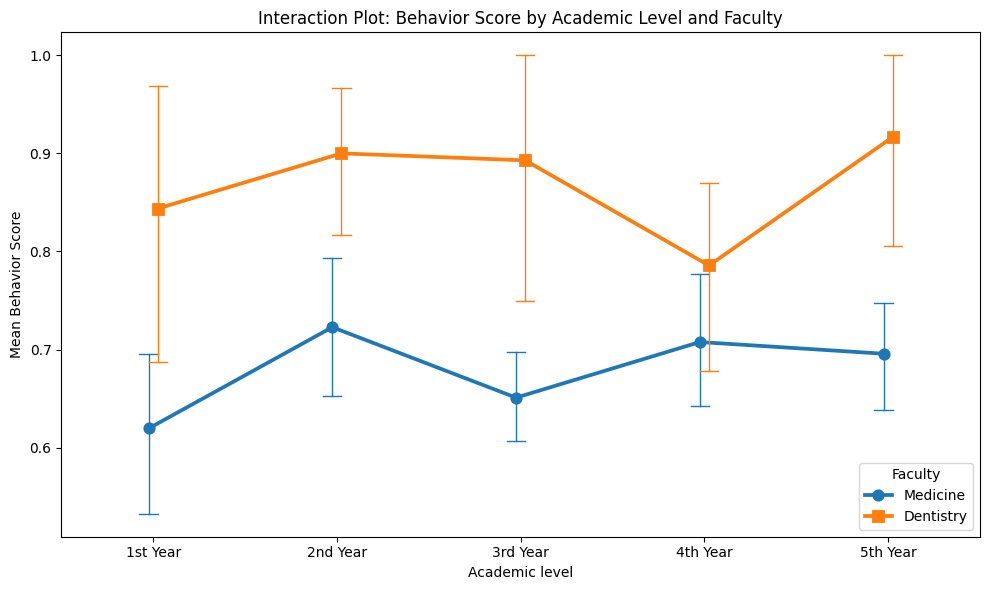

In [634]:
order = ["1st Year", "2nd Year", "3rd Year", "4th Year", "5th Year"]

plt.figure(figsize=(10, 6))
sns.pointplot(
    data=df_behavior,
    x="Academic level",
    y="behavior_score",
    hue="Faculty",
    dodge=True,
    order=order,
    markers=["o", "s"],
    capsize=0.1,
    errwidth=1,
)
plt.title("Interaction Plot: Behavior Score by Academic Level and Faculty")
plt.ylabel("Mean Behavior Score")
plt.tight_layout()
plt.show()

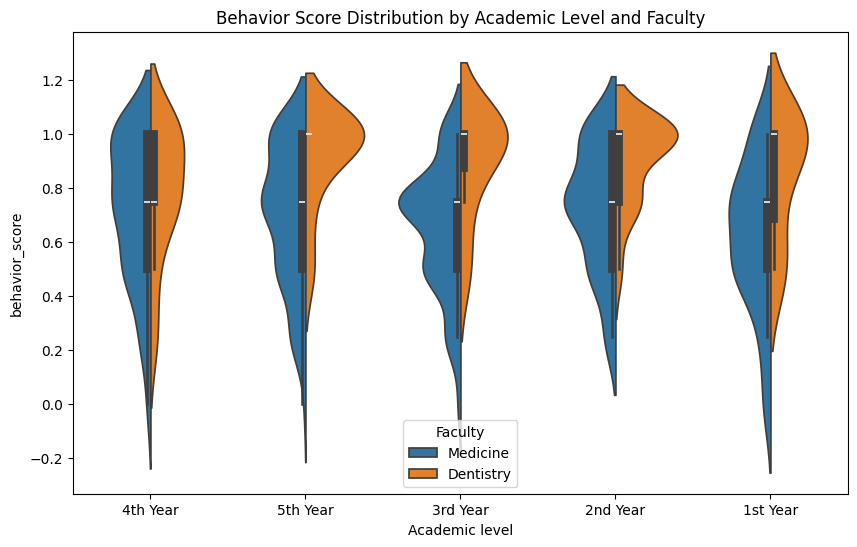

In [605]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_behavior, x="Academic level", y="behavior_score", hue="Faculty", split=True
)
plt.title("Behavior Score Distribution by Academic Level and Faculty")
plt.show()

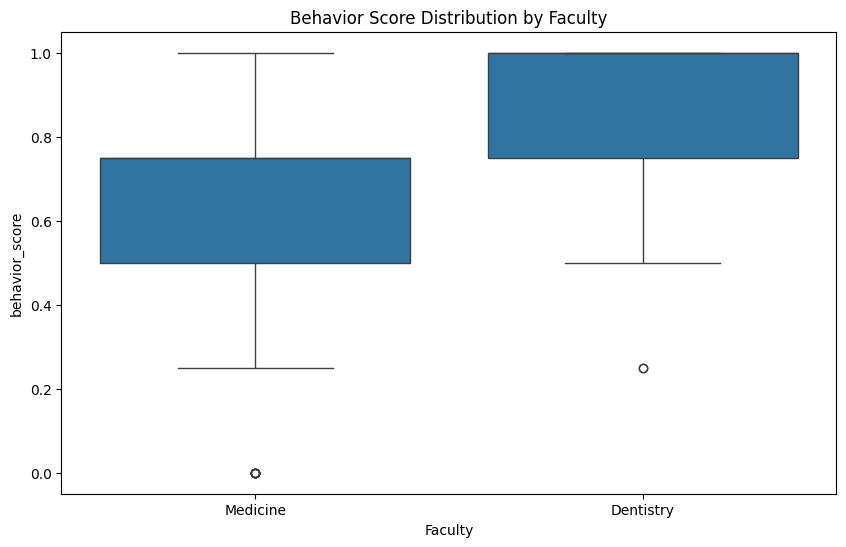

In [633]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_behavior, x="Faculty", y="behavior_score")
plt.title("Behavior Score Distribution by Faculty")
plt.show()

This shows significant difference in behavior score between dental and medical studnets.

In [606]:
groups = [
    group["behavior_score"].values for name, group in df_behavior.groupby("Faculty")
]
_, p = stats.ttest_ind(groups[0], groups[1], equal_var=False)
pivot_scores = df_behavior.pivot_table(
    index=[],  # no index, we want a single row
    columns="Faculty",
    values="behavior_score",
    aggfunc=np.mean,
).reset_index(drop=True)
pivot_scores["p-value"] = p
# I want to change the index name to behavior_score
pivot_scores.index.name = "behavior_score"
dfi.export(
    pivot_scores,
    f"../results/tables/behavior_analysis_score_faculty.png",
    table_conversion="chrome",
)
pivot_scores

/var/folders/k8/490lh42x07b9r46c0sf7k9jh0000gn/T/ipykernel_82611/3980705937.py:5: FutureWarning: The provided callable <function mean at 0x11388e020> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_scores = df_behavior.pivot_table(


Faculty,Dentistry,Medicine,p-value
behavior_score,,,
0,0.854167,0.678152,7.334261e-08


It's evident that Dental students have better behavior scores compared to medical studnets.

In [659]:
groups = [
    group["behavior_score"].values for name, group in df_behavior.groupby("Gender")
]
_, p = stats.ttest_ind(groups[0], groups[1], equal_var=False)
pivot_scores = df_behavior.pivot_table(
    index=[], columns="Gender", values="behavior_score", aggfunc=np.mean
).reset_index(drop=True)
pivot_scores["p-value"] = p
pivot_scores.index.name = "behavior_score"
dfi.export(
    pivot_scores,
    f"../results/tables/behavior_analysis_score_level_gender.png",
    table_conversion="chrome",
)
pivot_scores

/var/folders/k8/490lh42x07b9r46c0sf7k9jh0000gn/T/ipykernel_82611/734409001.py:5: FutureWarning: The provided callable <function mean at 0x11388e020> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_scores = df_behavior.pivot_table(


Gender,Female,Male,p-value
behavior_score,,,
0,0.723039,0.644737,0.013411


There's a significant difference in behavior score between dental and medical students, with dental students scoring higher on average. The p-value indicates that this difference is statistically significant, suggesting that the faculty (Dentistry vs Medicine) has a meaningful impact on behavior scores.
There's also a significant difference in behavior scores between males and females.

# Scoring and Analyzing Oral health Status

In [608]:
df_status = df[
    [
        "RecordID",
        "Gender",
        "Faculty",
        "Academic level",
        "What oral health problem(s) do you have (you can choose more than one):",
    ]
].copy()

df_status.rename(
    columns={
        "What oral health problem(s) do you have (you can choose more than one):": "Q1"
    },
    inplace=True,
)
df_status

,RecordID,Gender,Faculty,Academic level,Q1
0,0,Male,Medicine,4th Year,Abnormal growth of last molar in the left side...
1,1,Male,Medicine,5th Year,Dental caries
2,2,Male,Dentistry,4th Year,No problem
3,3,Male,Medicine,5th Year,Toothache
4,4,Male,Medicine,3rd Year,Toothache
...,...,...,...,...,...
396,403,Male,Medicine,4th Year,Tooth hypersensitivity
397,404,Male,Medicine,4th Year,Oral ulcers
398,405,Female,Medicine,5th Year,"Dental caries, Gingival bleeding, Oral ulcers,..."
399,406,Male,Medicine,4th Year,Dental caries


In [609]:
oral_health_problems = [
    "Bad breath",
    "Bruxism",
    "Dental caries",
    "Gingival bleeding",
    "Oral ulcers",
    "Toothache",
    "Tooth discolorationTooth hypersensitivity",
    "No problem",
]
df_status.loc[~df_status["Q1"].isin(oral_health_problems), "Q1"] = "Others"
df_status

,RecordID,Gender,Faculty,Academic level,Q1
0,0,Male,Medicine,4th Year,Others
1,1,Male,Medicine,5th Year,Dental caries
2,2,Male,Dentistry,4th Year,No problem
3,3,Male,Medicine,5th Year,Toothache
4,4,Male,Medicine,3rd Year,Toothache
...,...,...,...,...,...
396,403,Male,Medicine,4th Year,Others
397,404,Male,Medicine,4th Year,Oral ulcers
398,405,Female,Medicine,5th Year,Others
399,406,Male,Medicine,4th Year,Dental caries


In [610]:
mlb = MultiLabelBinarizer()

df_status["Q1_split"] = df_status["Q1"].str.split(", ")

one_hot = pd.DataFrame(
    mlb.fit_transform(df_status["Q1_split"]),
    columns=mlb.classes_,
    index=df_behavior_wide.index,
)
df_status.drop(columns=["Q1_split"], inplace=True)
df_join = df_status.join(one_hot)

In [611]:
problems = list(one_hot.columns)
problems.pop(4)  # Remove 'No problem' if it exists

'No problem'

In [612]:
import numpy as np

df_join["oral_status"] = np.where(
    (df_join[problems].sum(axis=1) == 0) & (df_join["No problem"] == 1), True, False
)

df_join

,RecordID,Gender,Faculty,Academic level,Q1,Bad breath,Bruxism,Dental caries,Gingival bleeding,No problem,Oral ulcers,Others,Toothache,oral_status
0,0,Male,Medicine,4th Year,Others,0,0,0,0,0,0,1,0,False
1,1,Male,Medicine,5th Year,Dental caries,0,0,1,0,0,0,0,0,False
2,2,Male,Dentistry,4th Year,No problem,0,0,0,0,1,0,0,0,True
3,3,Male,Medicine,5th Year,Toothache,0,0,0,0,0,0,0,1,False
4,4,Male,Medicine,3rd Year,Toothache,0,0,0,0,0,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,403,Male,Medicine,4th Year,Others,0,0,0,0,0,0,1,0,False
397,404,Male,Medicine,4th Year,Oral ulcers,0,0,0,0,0,1,0,0,False
398,405,Female,Medicine,5th Year,Others,0,0,0,0,0,0,1,0,False
399,406,Male,Medicine,4th Year,Dental caries,0,0,1,0,0,0,0,0,False


In [613]:
pvals = {}

compute_pvalues_fisher(
    df_long=df_join,
    group_col=["Academic level", "Faculty"],
    value_col="oral_status",
    pvals=pvals,
)

In [614]:
df_status_pivot = df_join.pivot_table(
    index=[],
    columns=["Academic level", "Faculty"],
    values="oral_status",
    aggfunc="mean",
)

In [615]:
table = final_table(df_status_pivot, pvals, "oral_health_status_level_faculty")
table

1st Year                    2nd Year                   3rd Year  \
            Dentistry  Medicine p-value Dentistry Medicine p-value Dentistry   
oral_status     0.375  0.304348     0.7  0.533333  0.23913    0.05  0.285714   

                               4th Year                    5th Year            \
             Medicine p-value Dentistry  Medicine p-value Dentistry  Medicine   
oral_status  0.158416    0.33  0.380952  0.261538    0.41       0.0  0.253012   

                     
            p-value  
oral_status    0.11

It seems like a broad scoring in measurements of health doesn't strike major differences (or great statistically significant ones) between different academic levels,

In [616]:
pvals = {}

compute_pvalues_fisher(
    df_long=df_join,
    group_col=["Faculty"],
    value_col="oral_status",
    pvals=pvals,
)

In [617]:
df_status_pivot = df_join.pivot_table(
    index=[],
    columns=["Faculty"],
    values="oral_status",
    aggfunc="mean",
)

In [618]:
p_vals = pd.Series(pvals, index=df_status_pivot.index)
table_with_p_faculty = pd.concat([df_status_pivot, p_vals.rename("p-value")], axis=1)
table_with_p_faculty.columns.name = None
dfi.export(
    table_with_p_faculty,
    f"../results/tables/oral_health_status_faculty.png",
    table_conversion="chrome",
)
table_with_p_faculty

,Dentistry,Medicine,p-value
oral_status,0.35,0.231672,0.07


In [635]:
pvals = {}

compute_pvalues_fisher(
    df_long=df_join,
    group_col=["Gender"],
    value_col="oral_status",
    pvals=pvals,
)

In [636]:
df_status_pivot = df_join.pivot_table(
    index=[],
    columns=["Gender"],
    values="oral_status",
    aggfunc="mean",
)

In [637]:
p_vals = pd.Series(pvals, index=df_status_pivot.index)
table_with_p_faculty = pd.concat([df_status_pivot, p_vals.rename("p-value")], axis=1)
table_with_p_faculty.columns.name = None
dfi.export(
    table_with_p_faculty,
    f"../results/tables/oral_health_status_gender.png",
    table_conversion="chrome",
)
table_with_p_faculty

,Female,Male,p-value
oral_status,0.228758,0.315789,0.1


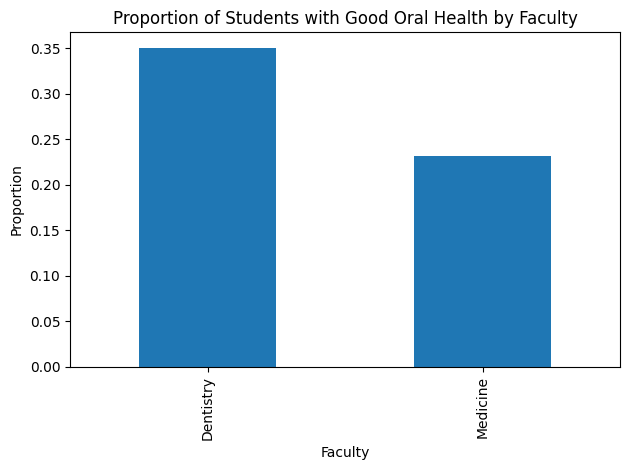

In [665]:
df_join.groupby("Faculty")["oral_status"].mean().plot(kind="bar")
plt.title("Proportion of Students with Good Oral Health by Faculty")
plt.ylabel("Proportion")
plt.xlabel("Faculty")
plt.tight_layout()
plt.show()

In [663]:
df_join

,RecordID,Gender,Faculty,Academic level,Q1,Bad breath,Bruxism,Dental caries,Gingival bleeding,No problem,Oral ulcers,Others,Toothache,oral_status
0,0,Male,Medicine,4th Year,Others,0,0,0,0,0,0,1,0,False
1,1,Male,Medicine,5th Year,Dental caries,0,0,1,0,0,0,0,0,False
2,2,Male,Dentistry,4th Year,No problem,0,0,0,0,1,0,0,0,True
3,3,Male,Medicine,5th Year,Toothache,0,0,0,0,0,0,0,1,False
4,4,Male,Medicine,3rd Year,Toothache,0,0,0,0,0,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,403,Male,Medicine,4th Year,Others,0,0,0,0,0,0,1,0,False
397,404,Male,Medicine,4th Year,Oral ulcers,0,0,0,0,0,1,0,0,False
398,405,Female,Medicine,5th Year,Others,0,0,0,0,0,0,1,0,False
399,406,Male,Medicine,4th Year,Dental caries,0,0,1,0,0,0,0,0,False


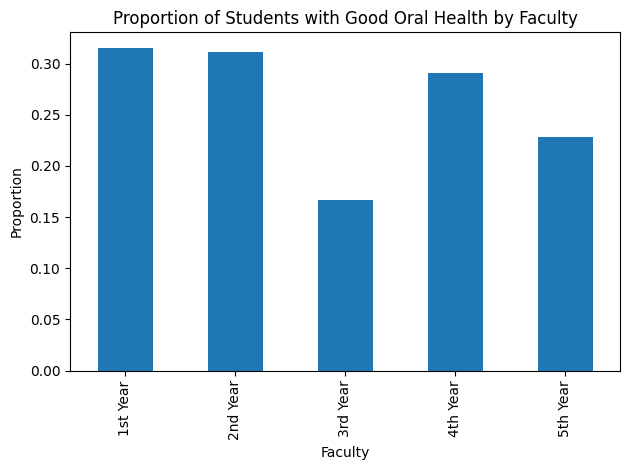

In [666]:
df_join.groupby("Academic level")["oral_status"].mean().plot(kind="bar")
plt.title("Proportion of Students with Good Oral Health by Faculty")
plt.ylabel("Proportion")
plt.xlabel("Faculty")
plt.tight_layout()
plt.show()

In [619]:
pvals = {}
for col in one_hot.columns:
    compute_pvalues_fisher(
        df_long=df_join,
        group_col=["Academic level", "Faculty"],
        value_col=col,
        pvals=pvals,
    )

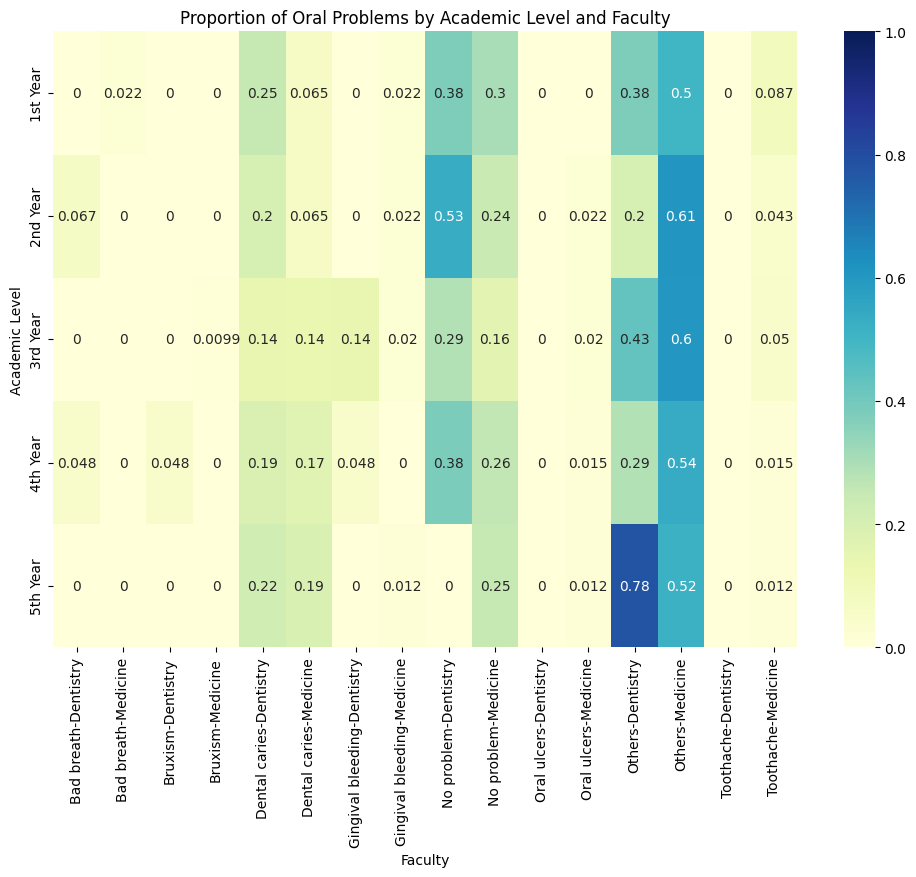

In [620]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = df_join.pivot_table(
    index="Academic level", columns="Faculty", values=one_hot.columns, aggfunc="mean"
)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", vmin=0, vmax=1)
plt.title("Proportion of Oral Problems by Academic Level and Faculty")
plt.ylabel("Academic Level")
plt.xlabel("Faculty")
plt.show()

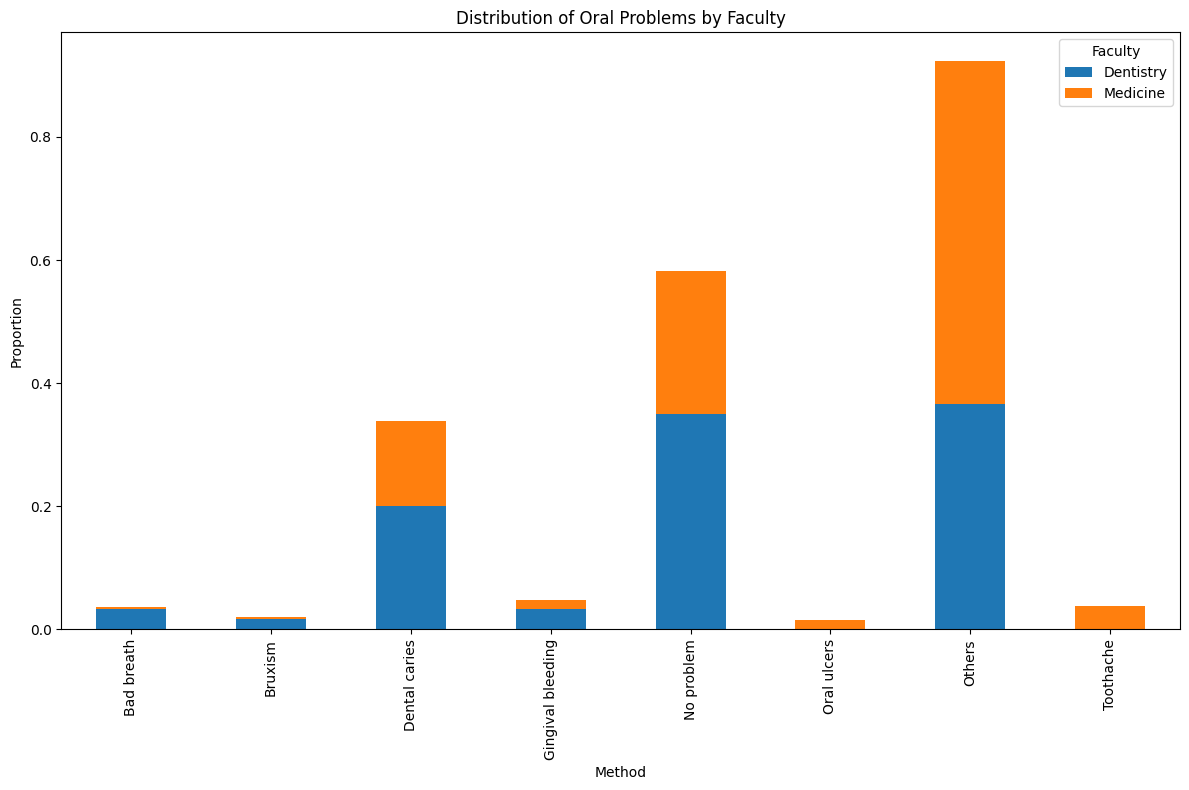

In [621]:
method_counts = df_join.groupby("Faculty")[one_hot.columns].sum()
method_props = method_counts.div(method_counts.sum(axis=1), axis=0)

method_props.T.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title("Distribution of Oral Problems by Faculty")
plt.ylabel("Proportion")
plt.xlabel("Method")
plt.legend(title="Faculty")
plt.tight_layout()
plt.show()

In [622]:
df_behavior_pivot = df_join.pivot_table(
    index=[],
    columns=["Academic level", "Faculty"],
    values=one_hot.columns,
    aggfunc="mean",
)

In [623]:
table = final_table(df_behavior_pivot, pvals, "oral_health_problems_level_faculty")
table

1st Year                    2nd Year                    \
                  Dentistry  Medicine p-value Dentistry  Medicine p-value   
Bad breath            0.000  0.021739    1.00  0.066667  0.000000    0.25   
Bruxism               0.000  0.000000     NaN  0.000000  0.000000     NaN   
Dental caries         0.250  0.065217    0.15  0.200000  0.065217    0.15   
Gingival bleeding     0.000  0.021739    1.00  0.000000  0.021739    1.00   
No problem            0.375  0.304348    0.70  0.533333  0.239130    0.05   
Oral ulcers           0.000  0.000000     NaN  0.000000  0.021739    1.00   
Others                0.375  0.500000    0.71  0.200000  0.608696    0.01   
Toothache             0.000  0.086957    1.00  0.000000  0.043478    1.00   

                   3rd Year                    4th Year                    \
                  Dentistry  Medicine p-value Dentistry  Medicine p-value   
Bad breath         0.000000  0.000000     NaN  0.047619  0.000000    0.24   
Bruxism            0.000000  0.009901    1.00  0.047619  0.000000    0.24   
Dental caries      0.142857  0.138614    1.00  0.190476  0.169231    1.00   
Gingival bleeding  0.142857  0.019802    0.18  0.047619  0.000000    0.24   
No problem         0.285714  0.158416    0.33  0.380952  0.261538    0.41   
Oral ulcers        0.000000  0.019802    1.00  0.000000  0.015385    1.00   
Others             0.428571  0.603960    0.44  0.285714  0.538462    0.05   
Toothache          0.000000  0.049505    1.00  0.000000  0.015385    1.00   

                   5th Year                    
                  Dentistry  Medicine p-value  
Bad breath         0.000000  0.000000     NaN  
Bruxism            0.000000  0.000000     NaN  
Dental caries      0.222222  0.192771    1.00  
Gingival bleeding  0.000000  0.012048    1.00  
No problem         0.000000  0.253012    0.11  
Oral ulcers        0.000000  0.012048    1.00  
Others             0.777778  0.518072    0.17  
Toothache          0.000000  0.012048    1.00

In [624]:
df_behavior_faculty_pivot = df_join.pivot_table(
    index=[], columns=["Faculty"], values=one_hot.columns, aggfunc="mean"
)

In [625]:
pvals = {}
for col in one_hot.columns:
    compute_pvalues_fisher(
        df_long=df_join, group_col=["Faculty"], value_col=col, pvals=pvals
    )

In [626]:
p_vals = pd.Series(pvals, index=df_behavior_faculty_pivot.index)
table_with_p_faculty = pd.concat(
    [df_behavior_faculty_pivot, p_vals.rename("p-value")], axis=1
)
table_with_p_faculty.columns.name = None
dfi.export(
    table_with_p_faculty,
    f"../results/tables/oral_health_problems_faculty.png",
    table_conversion="chrome",
)
table_with_p_faculty

,Dentistry,Medicine,p-value
Bad breath,0.033333,0.002933,0.06
Bruxism,0.016667,0.002933,0.28
Dental caries,0.200000,0.137830,0.23
Gingival bleeding,0.033333,0.014663,0.28
No problem,0.350000,0.231672,0.07
Oral ulcers,0.000000,0.014663,1.00
Others,0.366667,0.557185,0.01
Toothache,0.000000,0.038123,0.23


Dental students had lower prevalence rate of oral health problems than their medical counterparts in some aspect

In [627]:
df_behavior_gender_pivot = df_join.pivot_table(
    index=[], columns=["Gender"], values=one_hot.columns, aggfunc="mean"
)

In [628]:
pvals = {}
for col in one_hot.columns:
    compute_pvalues_fisher(
        df_long=df_join, group_col=["Gender"], value_col=col, pvals=pvals
    )

In [629]:
p_vals = pd.Series(pvals, index=df_behavior_gender_pivot.index)
table_with_p_gender = pd.concat(
    [df_behavior_gender_pivot, p_vals.rename("p-value")], axis=1
)
table_with_p_gender.columns.name = None
dfi.export(
    table_with_p_faculty,
    f"../results/tables/oral_health_problems_gender.png",
    table_conversion="chrome",
)
table_with_p_gender

,Female,Male,p-value
Bad breath,0.006536,0.010526,0.56
Bruxism,0.006536,0.000000,1.00
Dental caries,0.153595,0.126316,0.62
Gingival bleeding,0.016340,0.021053,0.67
No problem,0.228758,0.315789,0.10
Oral ulcers,0.006536,0.031579,0.09
Others,0.555556,0.442105,0.06
Toothache,0.026144,0.052632,0.20


In [ ]:
compute_pvalues_fisher(
    df_long=df_behavior, group_col=["Faculty"], value_col=question, pvals=pvals
)

,RecordID,Gender,Faculty,Academic level,Q1,Q2,Q3,Q4,Q5,Q6,Q1_score,Q2_score,Q3_score,Q4_score,behavior_score
0,0,Male,Medicine,4th Year,1,2 to 3 minutes,Every three months,When I have a dental problem/oral disease,Irregular,Mouthwash,0,1,1,0,0.50
1,1,Male,Medicine,5th Year,2,More than 3 minutes,Every three months,Twice a year,Horizontal scrub,Mouthwash,1,1,1,1,1.00
2,2,Male,Dentistry,4th Year,2,2 to 3 minutes,Every three months,Twice a year,Modified pass technique,Toothpick,1,1,1,1,1.00
3,3,Male,Medicine,5th Year,1,More than 3 minutes,Every three months,Once a year,Vertical scrub,Mouthwash,0,1,1,1,0.75
4,4,Male,Medicine,3rd Year,1,2 to 3 minutes,Until it can't be used,When I have a dental problem/oral disease,Horizontal scrub,Sugar-free chewing gum,0,1,0,0,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,403,Male,Medicine,4th Year,2,More than 3 minutes,Every two months,Once a year,Modified pass technique,Mouthwash,1,1,1,1,1.00
397,404,Male,Medicine,4th Year,2,2 to 3 minutes,Every three months,When I have a dental problem/oral disease,Modified pass technique,Mouthwash,1,1,1,0,0.75
398,405,Female,Medicine,5th Year,More than 2,2 to 3 minutes,Every month,More than 2 times a year,Modified pass technique,"Dental floss, Mouthwash, Sugar-free chewing gum",1,1,1,0,0.75
399,406,Male,Medicine,4th Year,2,More than 3 minutes,Every month,When I have a dental problem/oral disease,Irregular,"Dental floss, Mouthwash, Sugar-free chewing gu...",1,1,1,0,0.75


In [632]:
df_knowledge = pd.read_csv("../data/processed/knowledge_scores.csv")
df_knowledge_behavior_status = pd.merge(
    df_knowledge,
    df_behavior_status[["RecordID", "behavior_score", "oral_status"]],
    how="right",
    left_index=True,
    right_index=True,
)
df_knowledge_behavior_status.drop(columns=["RecordID_y"], inplace=True)
df_knowledge_behavior_status.rename(columns={"RecordID_x": "RecordID"}, inplace=True)
df_knowledge_behavior_status.to_csv(
    "../data/processed/knowledge_behavior_status_scores.csv", index=False
)